Handwritten digits classification for extreme beginners
1. Brainstorming, how to build your own deep learning model Role of each layer (CNN, Pooling, Dense)
    * MNIST - dataset

2. stepwise implementation for python code
    * Single Image - digits recognition
    * Video Demo

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize

import matplotlib.pyplot as plt
import numpy as np

# Loading "MNIST" Data Set
* Containing Training samples=60,000 and Testing Samples=10,000
* TensorFlow already contain MNIST dataset whcih can be loaded using keras 

# After loading the MNIST dataset, divide into train, test dataset

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

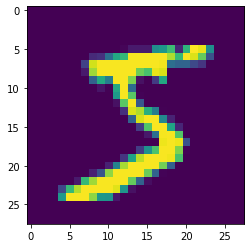

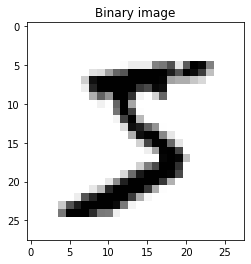

In [14]:
plt.imshow(x_train[0])
plt.show()

## however we don't know wheter its color image or binary images
## so inorder to plot it, change the configuration
plt.title('Binary image')
plt.imshow(x_train[0],cmap=plt.cm.binary)

## Checking the values of each pixel
## Before Normalization

In [15]:
print(x_train[0])#before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level(1 channel==>0 to 255), not colored(RGB)
## Normalizing the data | Pre-process step

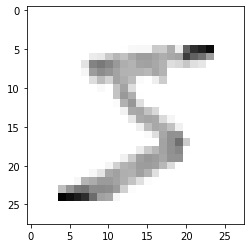

In [20]:
### its gray image and all values varies from 0 to 255
### in order to normalize it
### normalize can be x_train/255, but we apply as below format

x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

## After Normalize

In [21]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
print(y_train[0])

5


## Resizing image to make it suitable for apply Convolution operation

In [26]:
#here, -1 means total number of sample
IMG_SIZE=28
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ### increasing one dimention for kernel=filter operation
x_test=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) ### increasing one dimention for kernel operation
print("Training Samples dimension",x_train.shape)
print("Testing Samples dimension",x_test.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Crating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Activation,Dropout,ReLU

In [30]:
#### Creating a neural network now
model=Sequential()

#### First Convolution Layer 0 1 2 3 (60000,28,28,1) skip 0 means 60000 images
#### 28-3+1=26x26
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:])) ##only for first convolution layer to mention input layer size
model.add(Activation('relu'))##activation function to make it non-linear, "all values"<0 will remove to process next step
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling: single maximum value of 2x2 will get, and rest will remove

#### Second Convolution layer; 13-3+1=11
model.add(Conv2D(64,(3,3))) ## 2nd convolution layer
model.add(Activation('relu')) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

#### 3rd Convolution layer; 5-3+1=3
model.add(Conv2D(64,(3,3))) ## 3rd convolution layer
model.add(Activation('relu')) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

#### Fully Connected layer# 1 3/2=1.5=1; supose total neuron 20x20=400
model.add(Flatten()) ### before using fully connected layer, we need to be a flatten so that 20 to 20
model.add(Dense(64))
model.add(Activation('relu'))

#### Fully Connected layer# 2 
model.add(Dense(32))
model.add(Activation('relu'))

#### Last Fully Connected layer, output must be equal to number of classes, 10(0-9)
model.add(Dense(10)) ##this last dense layer must be equal to 10
model.add(Activation('softmax')) ##activation function is changed to softmax(class probabilities)

## binary classification, one neuron in Dense layer, activation function is "sigmoid"


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)         

In [32]:
print('Total Training Samples= ',len(x_train))

Total Training Samples=  60000


# Model Compile

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)##training the model

2022-03-17 21:06:49.352172: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-17 21:06:49.352910: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-03-17 21:06:49.598469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - ETA: 0s - loss: 0.3380 - accuracy: 0.8917

2022-03-17 21:07:06.190234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 19s 12ms/step - loss: 0.3380 - accuracy: 0.8917 - val_loss: 0.1827 - val_accuracy: 0.9417
Epoch 2/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.1303 - val_accuracy: 0.9579
Epoch 3/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0795 - accuracy: 0.9761 - val_loss: 0.0992 - val_accuracy: 0.9711
Epoch 4/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0611 - accuracy: 0.9808 - val_loss: 0.0718 - val_accuracy: 0.9778
Epoch 5/5
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0694 - val_accuracy: 0.9798


1. Validation accuracy ~= accuracy; this model is ok
2. validation accuracy < accuracy; for example validation accuracy is 30% and accuracy is 98%, so this is overfitting. Solution for overfitting is dropout,


# Evaluation

In [39]:
### Evaluating on testing dataset of MNIST of 10,000 dataset

test_loss,test_accuracy=model.evaluate(x_test,y_test)
print()
print("Test loss on 10,000 test samples: ",test_loss)
print("Validation accuracy on 10,000 test samples: ",test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9794

Test loss on 10,000 test samples:  0.06818100810050964
Validation accuracy on 10,000 test samples:  0.9794000387191772


In [40]:
# Prediction the model
## predictions=new_model.predict([x_test])
predictions=model.predict([x_test])
print(predictions)# actually this predictions are based on one hot encoding, so these are only arrays

2022-03-17 21:09:46.643689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[[1.16661461e-07 1.47736091e-05 1.67310238e-04 ... 9.99722064e-01
  5.79191465e-07 8.74371290e-06]
 [4.21786490e-06 2.59423746e-06 9.99950647e-01 ... 2.91277884e-05
  9.10362530e-07 8.71641745e-08]
 [6.98787562e-06 9.99850750e-01 2.16500557e-05 ... 1.52501786e-06
  2.88101182e-06 4.08056025e-07]
 ...
 [1.15508286e-07 7.35348112e-06 2.31354008e-07 ... 1.22153742e-05
  9.21618812e-06 4.04009370e-05]
 [6.99378916e-06 1.38216038e-07 1.04534020e-05 ... 6.46441762e-08
  2.57311840e-05 1.14762747e-06]
 [2.46030031e-05 2.21222919e-07 1.69908702e-07 ... 9.11016897e-08
  2.39430028e-06 1.55861144e-07]]


In [41]:
## in order to understand, convert the predictions from one hot encoding; so we need to use numpy for that
print(np.argmax(predictions[0]))##argmax will return the maximum value index and find the value of it

7


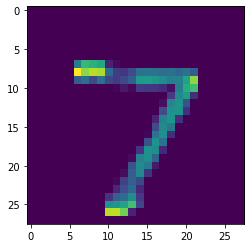

In [45]:
#now to check that is our answer is true or not
plt.imshow(x_test[0])

In [46]:
## in order to understand, convert the predictions from one hot encoding; so we need to use numpy for that
print(np.argmax(predictions[128]))##argmax will return the maximum value index and find the value of it

8


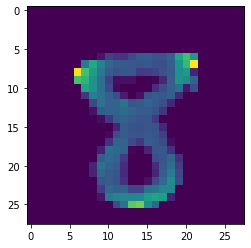

In [47]:
#now to check that is our answer is true or not
plt.imshow(x_test[128])

# Cross check image with written by hand digit or download from internet

In [48]:
import cv2

In [49]:
img=cv2.imread("digit_3.png")

In [51]:
img.shape

(452, 451, 3)

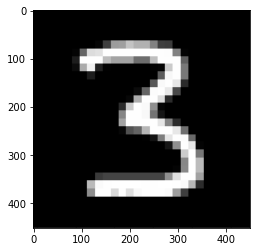

In [50]:
plt.imshow(img)

In [54]:
# first convert color image to gray image, then resize the image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape##color channel has gone

(452, 451)

In [55]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [56]:
# normalize the image 
newimg=normalize(resized,axis=1)##0 to 1 scaling

In [58]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)#kernel operation of convolution layer
newimg.shape

(1, 28, 28, 1)

In [59]:
predictions=model.predict(newimg)

2022-03-17 22:12:03.901855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [60]:
print(np.argmax(predictions))

3


# Video demo

In [62]:
import numpy as np
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture("video.mp4.html")
#cap.set(cv2.CAP_PROP_FPS,170)
# check if the webcam is opened correctly

if not cap.isOpened():
    raise IOError('Cannot open video')
    
text="some text in a box"
# get the width and height of the text box
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
#set the text start position
text_offset_x=10
text_offset_y=img.shape[0]-25

#make the coords of the box with a small padding of two pixels
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))

cntr=0;
while True:
    ret,frame=cap.read()
    cntr=cntr+1;
    
    if((cntr%2)==0):
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        resized=cv2.resized(gray,(28,28),interpolation=cv2.INTER_AREA)
        newimg=tf.keras.utlis.normalize(resized,axis=1)
        newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
        predictions=model.predict(newimg)
        status=np.argmax(predictions)
        
        print(status)
        print(type(status))
        
        x1,y1,w1,h1=0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.imshow("Handwritten Digit Recognition Tutorial",frame)
        
        if cv2.waitkey(2)&0xFF==ord('q'):
            break
cap.release()
cv2.destroyAllwindows()

OpenCV: Couldn't read video stream from file "video.mp4.html"


OSError: Cannot open video